Bibliotecas 

In [26]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style

In [27]:
style.use('bmh')

Coletando os dados 

In [125]:
def preco_fechamento(ticker, inicio, fim):
    dados = yf.download(ticker + '.SA', start=inicio, end=fim)['Adj Close']
    return dados

Buscando a empresa 

In [126]:
tots = pd.DataFrame(preco_fechamento('TOTS3', '2020-01-01', '2021-10-30'))
tots.tail()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-10-25,33.380001
2021-10-26,33.400002
2021-10-27,33.200001
2021-10-28,32.910000
2021-10-29,32.759998


Gráfico: cotação

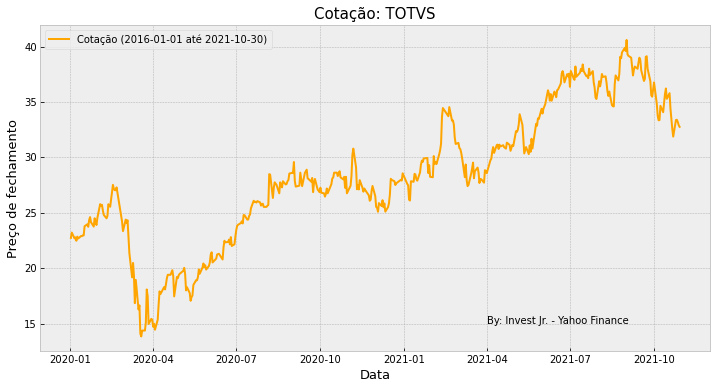

In [127]:
plt.figure(figsize=(12, 6));
x, = plt.plot(tots, color='orange');
plt.title('Cotação: TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Preço de fechamento', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), 15, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], ['Cotação (2016-01-01 até 2021-10-30)'], fontsize=10);


Calculando retorno simples

In [128]:
def retorno(variavel):
    retorno = variavel.pct_change()
    return retorno

In [129]:
tots_retorno = retorno(tots)
tots_retorno.head()

,Adj Close
Date,
2020-01-02,NaN
2020-01-03,0.021258
2020-01-06,-0.022798
2020-01-07,0.004202
2020-01-08,-0.013420


Calculando retorno acumulado

In [130]:
def retorno_acumulado(variavel):
    retorno_acumulado = (1 + variavel).cumprod()
    retorno_acumulado.iloc[0] = 1
    return retorno_acumulado

In [131]:
tots_retacum = retorno_acumulado(tots_retorno)
tots_retacum.tail()


,Adj Close
Date,
2021-10-25,1.468175
2021-10-26,1.469055
2021-10-27,1.460258
2021-10-28,1.447503
2021-10-29,1.440905


Gráfico: retorno simples

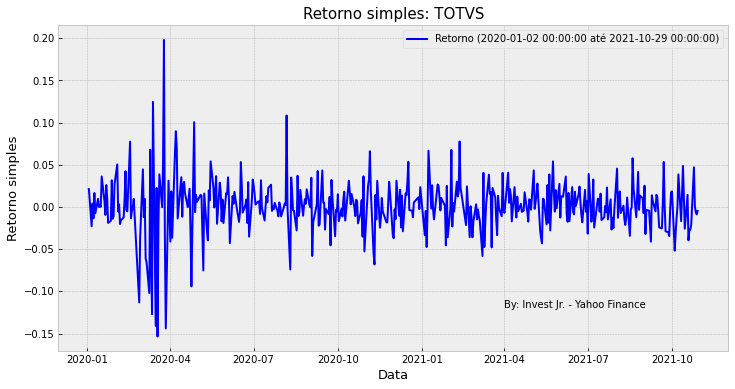

In [132]:
plt.figure(figsize=(12, 6));
x, = plt.plot(tots_retorno, color='blue');
plt.title('Retorno simples: TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Retorno simples', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), -0.12, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Retorno ({tots_retorno.index[0]} até {tots_retorno.index[-1]})'], fontsize=10);

Gráfico: retorno acumulado

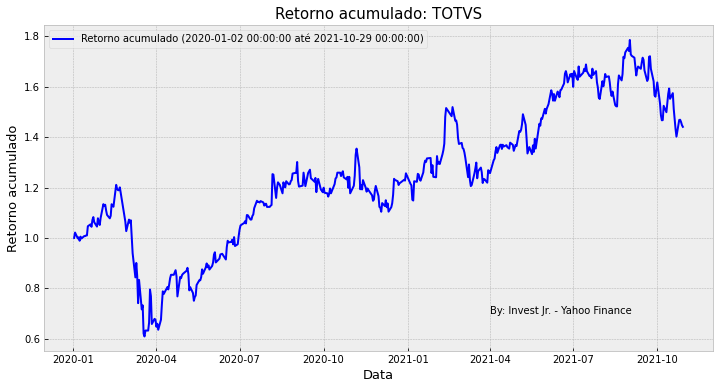

In [133]:
plt.figure(figsize=(12, 6));
x, = plt.plot(tots_retacum, color='blue');
plt.title('Retorno acumulado: TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Retorno acumulado', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), 0.7, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Retorno acumulado ({tots_retacum.index[0]} até {tots_retacum.index[-1]})'], fontsize=10);

Carteira teórica

In [134]:
def preco_fechamento_carteira_teorica(ticker, inicio, fim):
    dados = yf.download(ticker, start=inicio, end=fim)['Adj Close']
    return dados

In [135]:
ibov = pd.DataFrame(preco_fechamento_carteira_teorica('^BVSP', '2020-01-01', '2021-10-30'))
ibov.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
ibov.head()

[*********************100%***********************]  1 of 1 completed


,Adj_Close
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


Gráfico: fechamento ajustado

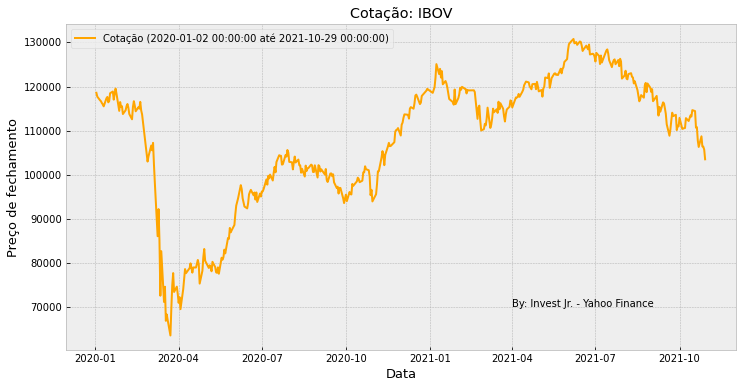

In [136]:
plt.figure(figsize=(12, 6));
x, = plt.plot(ibov, color='orange');
plt.title('Cotação: IBOV');
plt.xlabel('Data', fontsize=13);
plt.ylabel('Preço de fechamento', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), 70100, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Cotação ({ibov.index[0]} até {ibov.index[-1]})'], fontsize=10);

Calculando retorno simples

In [137]:
ibov_retorno = retorno(ibov)
ibov_retorno.head()

,Adj_Close
Date,
2020-01-02,NaN
2020-01-03,-0.007304
2020-01-06,-0.007043
2020-01-07,-0.001848
2020-01-08,-0.003557


Gráfico: retorno simples

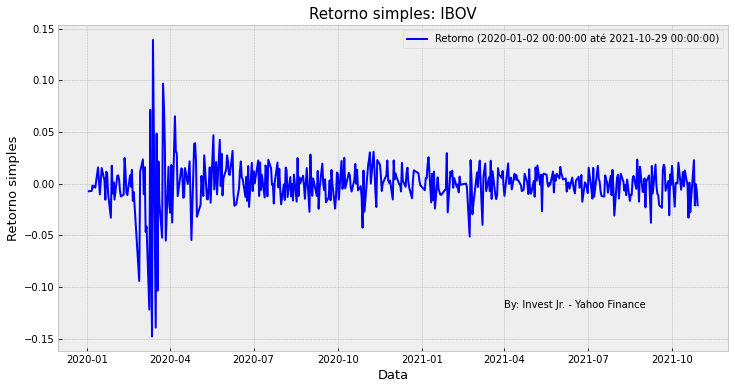

In [138]:
plt.figure(figsize=(12, 6));
x, = plt.plot(ibov_retorno, color='blue');
plt.title('Retorno simples: IBOV', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Retorno simples', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), -0.12, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Retorno ({ibov_retorno.index[0]} até {ibov_retorno.index[-1]})'], fontsize=10);

Calculando retorno acumulado

In [139]:
ibov_retacum = retorno_acumulado(ibov_retorno)
ibov_retacum.head()

,Adj_Close
Date,
2020-01-02,1.000000
2020-01-03,0.992696
2020-01-06,0.985705
2020-01-07,0.983883
2020-01-08,0.980383


In [140]:
print(type(ibov_retacum))

<class 'pandas.core.frame.DataFrame'>


Gráfico: retorno acumulado

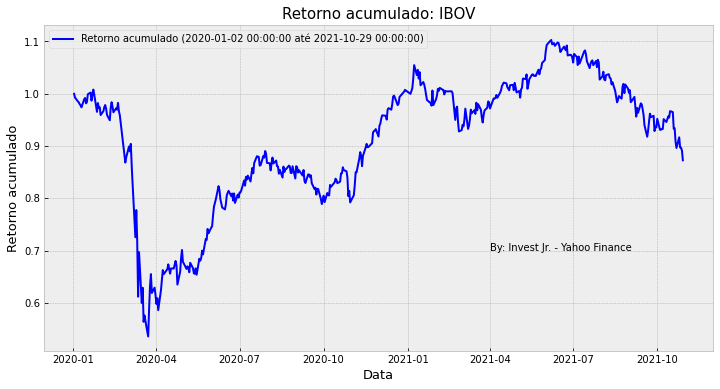

In [141]:
plt.figure(figsize=(12, 6));
x, = plt.plot(ibov_retacum, color='blue');
plt.title('Retorno acumulado: IBOV', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Retorno acumulado', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), 0.7, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x], [f'Retorno acumulado ({ibov_retacum.index[0]} até {ibov_retacum.index[-1]})'], fontsize=10);

IBOV versus empresa

Gráfico: retornos acumulados 

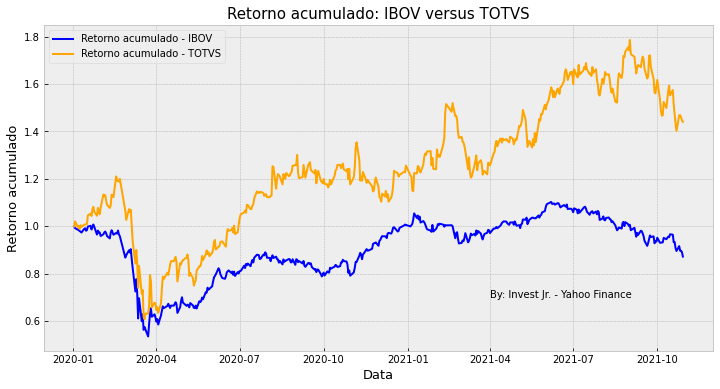

In [142]:
plt.figure(figsize=(12, 6));
x, = plt.plot(ibov_retacum, color='blue');
y, = plt.plot(tots_retacum, color='orange');
plt.title('Retorno acumulado: IBOV versus TOTVS', fontsize=15);
plt.xlabel('Data', fontsize=13);
plt.ylabel('Retorno acumulado', fontsize=13);
plt.text(np.Datetime64('2021-04-01'), 0.7, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x, y], ['Retorno acumulado - IBOV', 'Retorno acumulado - TOTVS'], fontsize=10, loc=2);

SCRIPT FINALIZADO!